In [ ]:
import pandas as pd

dataset = pd.read_csv('dataset/dataset_twiter_kuliah_daring.csv')
dataset = dataset[['tweet','polarity']]
data_convert = {'positive': 1, 'negative': -1, 'neutral':0}
dataset_convert=dataset.replace({"polarity": data_convert})

dataset_drop = dataset_convert
dataset_drop=dataset_drop[dataset_drop['polarity']!=0].dropna()
print(dataset_convert)
print(dataset_drop)

print('+++++++++++++++++++++++++++++++++++++++++++++++++++')
print(dataset_convert.groupby('polarity').size())
print("Jumlah Dimensi Data: ",dataset_convert.shape)

print('+++++++++++++++++++++++++++++++++++++++++++++++++++')
print(dataset_drop.groupby('polarity').size())
print("Jumlah Dimensi Data: ",dataset_drop.shape)
dataset_drop.to_csv('dataset/dataset_sentimen_ready2.csv',encoding='utf8', index=False)


                                                  tweet  polarity
0     @butiranmeses Engga juga, gw kuliah daring tet...        -1
1        Keknya w lebih produktif klo kuliah daring deh         1
2     Ado kito sir gosok baju lagi kuliah daring cak...        -1
3     Btw dengan kata lain kan semester depan masih ...         1
4                        kuliah daring, pas UAS pusing.        -1
...                                                 ...       ...
5806  Presentasi tugas kelompok.  Sewaktu kuliah S-1...        -1
5807  @06062OOO Alesan kuota cepet abis bukan karna ...         1
5808  Gw nanggung bngt . Kuliah daring tugas banyakk...         1
5809                          MUAK DENGAN KULIAH DARING        -1
5810  @unnesmenfess Sukanya ya dosen sering ngirim m...         0

[5811 rows x 2 columns]
                                                  tweet  polarity
0     @butiranmeses Engga juga, gw kuliah daring tet...        -1
1        Keknya w lebih produktif klo kuliah daring

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import time

start = time.time()

data = pd.read_csv('dataset/dataset_sentimen_ready2.csv')

def CaseFolding(text):
    text = text.lower()
    return text
data['CaseFolding'] = data['tweet'].apply(lambda x: CaseFolding(x))

def Cleaning(text):
    text = re.sub(r'@[\w]+','', text) #remove @username
    text = re.sub(r'^https?:\/\/.*[\r\nA-Za-z0-9]*', '', text) #remove link
    #text = re.sub(r'\d+',' ',text) #remove url
    text = re.sub(r'(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|(https[A-Za-z0-9\,-./]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',text) #remove hashtag
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*|0-9', '', text) #tanda baca
    text = re.sub(r'^"|"$', '', text)
    text = re.sub("([\u2070\u2071\u00b9\u00b2\u00b3\u2074-\u207F])", '', text)
    
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U0001F1F2-\U0001F1F4"  # Macau flag
            u"\U0001F1E6-\U0001F1FF"  # flags
            u"\U0001F600-\U0001F64F"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U0001F1F2"
            u"\U0001F1F4"
            u"\U0001F620"
            u"\u200d"
            u"\u2640-\u2642"
            "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) # no emoji
    return text
    #return ("".join([ch for ch in text if ch not in st.punctuation]))
data['Cleaning'] = data['CaseFolding'].apply(lambda x: Cleaning(x))

def Tokenizing(text):
    text = re.split('\s+' ,text)
    text = [x for x in text if len(x) > 1]
    return text
data['Tokenizing'] = data['Cleaning'].apply(lambda x : Tokenizing(x))

def Filtering(text):
    word_list = []
    for word in text:
        #word = word.lower() # in case they arenet all lower cased
        if word not in stopwords.words("indonesian"):
            word_list.append(word)
    return word_list
data['Filtering'] = data['Tokenizing'].apply(lambda x : Filtering(x))

def Stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(word) for word in text]
data['Stemming'] = data['Filtering'].apply(lambda x: Stemming(x))

def TextClean(text):
    return " ".join([word for word in text])
data['TextClean'] = data['Stemming'].apply(lambda x : TextClean(x))

end = time.time()

time_process = end - start
detik = round(time_process,0)
menit = round(detik/60,3)
print("Proses komputasi selama: ",detik,"detik atau",menit,"menit")

data.to_csv('dataset/dataset_praproses.csv',index=False)
data

Proses komputasi selama:  2502.0 detik atau 41.7 menit


,tweet,polarity,CaseFolding,Cleaning,Tokenizing,Filtering,Stemming,TextClean
0,"@butiranmeses Engga juga, gw kuliah daring tet...",-1,"@butiranmeses engga juga, gw kuliah daring tet...",engga juga gw kuliah daring tetep tidur cepet,"[engga, juga, gw, kuliah, daring, tetep, tidur...","[engga, gw, kuliah, daring, tetep, tidur, cepet]","[engga, gw, kuliah, daring, tetep, tidur, cepet]",engga gw kuliah daring tetep tidur cepet
1,Keknya w lebih produktif klo kuliah daring deh,1,keknya w lebih produktif klo kuliah daring deh,keknya w lebih produktif klo kuliah daring deh,"[keknya, lebih, produktif, klo, kuliah, daring...","[keknya, produktif, klo, kuliah, daring, deh]","[kek, produktif, klo, kuliah, daring, deh]",kek produktif klo kuliah daring deh
2,Ado kito sir gosok baju lagi kuliah daring cak...,-1,ado kito sir gosok baju lagi kuliah daring cak...,ado kito sir gosok baju lagi kuliah daring cak...,"[ado, kito, sir, gosok, baju, lagi, kuliah, da...","[ado, kito, sir, gosok, baju, kuliah, daring, ...","[ado, kito, sir, gosok, baju, kuliah, daring, ...",ado kito sir gosok baju kuliah daring cak asta...
3,Btw dengan kata lain kan semester depan masih ...,1,btw dengan kata lain kan semester depan masih ...,btw dengan kata lain kan semester depan masih ...,"[btw, dengan, kata, lain, kan, semester, depan...","[btw, semester, kuliah, daring, pengen, tau, k...","[btw, semester, kuliah, daring, ken, tau, kaba...",btw semester kuliah daring ken tau kabar baran...
4,"kuliah daring, pas UAS pusing.",-1,"kuliah daring, pas uas pusing.",kuliah daring pas uas pusing,"[kuliah, daring, pas, uas, pusing]","[kuliah, daring, pas, uas, pusing]","[kuliah, daring, pas, uas, pusing]",kuliah daring pas uas pusing
...,...,...,...,...,...,...,...,...
5388,"Gara2 kuliah daring, aku jadi melek tekhnologi.",-1,"gara2 kuliah daring, aku jadi melek tekhnologi.",gara kuliah daring aku jadi melek tekhnologi,"[gara, kuliah, daring, aku, jadi, melek, tekhn...","[gara, kuliah, daring, melek, tekhnologi]","[gara, kuliah, daring, melek, tekhnologi]",gara kuliah daring melek tekhnologi
5389,Presentasi tugas kelompok. Sewaktu kuliah S-1...,-1,presentasi tugas kelompok. sewaktu kuliah s-1...,presentasi tugas kelompok sewaktu kuliah s ...,"[presentasi, tugas, kelompok, sewaktu, kuliah,...","[presentasi, tugas, kelompok, kuliah, fisip, f...","[presentasi, tugas, kelompok, kuliah, fisip, f...",presentasi tugas kelompok kuliah fisip fauzan ...
5390,@06062OOO Alesan kuota cepet abis bukan karna ...,1,@06062ooo alesan kuota cepet abis bukan karna ...,alesan kuota cepet abis bukan karna kuliah da...,"[alesan, kuota, cepet, abis, bukan, karna, kul...","[alesan, kuota, cepet, abis, karna, kuliah, da...","[alesan, kuota, cepet, abis, karna, kuliah, da...",alesan kuota cepet abis karna kuliah daring tp...
5391,Gw nanggung bngt . Kuliah daring tugas banyakk...,1,gw nanggung bngt . kuliah daring tugas banyakk...,gw nanggung bngt kuliah daring tugas banyakk...,"[gw, nanggung, bngt, kuliah, daring, tugas, ba...","[gw, nanggung, bngt, kuliah, daring, tugas, ba...","[gw, nanggung, bngt, kuliah, daring, tugas, ba...",gw nanggung bngt kuliah daring tugas banyakk t...


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

import pandas as pd

dataset = pd.read_csv('dataset/dataset_praproses.csv')

tfIdfVectorizer=TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True)
data_text = dataset['TextClean']
count_word = CountVectorizer()
count_word.fit_transform(data_text) #hitung jumlah term
word_list=count_word.get_feature_names_out() #mengambil kata

tfIdf = tfIdfVectorizer.fit_transform(data_text).toarray() #hitung tfidf

tabel_tfidf=pd.DataFrame(tfIdf,columns=[word_list])
tabel_tfidf

,aa,aaa,aaaa,aaaaa,aaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaak,aaaah,aaaarrrggghh,aaahhhh,aahhhh,...,zm,zona,zonk,zonkk,zoom,zoomnya,zta,zum,zzz,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
import time
 
start = time.time()


K=5
kf = KFold(n_splits=K, random_state=12, shuffle=True) 
X=tfIdf
y=dataset['polarity']

akurasi_rata=list()
recall_rata=list()
presisi_rata=list()
f_score_rata=list()
kernels = input('Masukkan nama kernel= ')

c_matriks = list()

for train_index, test_index in kf.split(X):
    print("Train:", train_index, "\nTest:",test_index,'\n')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelSvm = SVC(kernel=kernels)
    modelSvm = modelSvm.fit(X_train,y_train)
    y_pred = modelSvm.predict(X_test)
    

    #save train model
#     with open("model_svm_"+kernels+"3.pkl",'wb') as output_pk:
#         pickle.dump(modelSvm,output_pk)

    cm = confusion_matrix(y_test, y_pred)
    c_matriks.append(cm)
    
    akurasi = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    presisi = precision_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)

    akurasi_rata.append(round(akurasi*100,2))
    recall_rata.append(round(recall*100,2))
    presisi_rata.append(round(presisi*100,2))
    f_score_rata.append(round(f_score*100,2))
    
    print("\n+++++++++++++++++++++ Akurasi= ",akurasi,"+++++++++++++++++++\n")

akurasi = akurasi_rata
recall = recall_rata
presisi = presisi_rata
fscore = f_score_rata
fold = 0
for i in range(len(akurasi)):
    #indeks = len(akurasi)
    result_akurasi = (akurasi[fold])

    print("Nilai fold %d dengan Akurasi %.2f"%(fold+1,result_akurasi))
    fold+=1

rata_acc = (sum(akurasi_rata) / len(akurasi_rata))

print("")
print("Rata-rata hasil uji dengan %d fold"%(K))
print("Akurasi= %.2f"%(rata_acc))

rata_acc = (sum(akurasi_rata) / len(akurasi_rata))
rata_rec = (sum(recall_rata) / len(recall_rata))
rata_pre = (sum(presisi_rata) / len(presisi_rata))
rata_fscore = (sum(fscore) / len(fscore))
data_tuples = list(zip(akurasi_rata,recall_rata, presisi_rata, f_score_rata))

col = ['1-fold', '2-fold', '3-fold', '4-fold', '5-fold','Rata-rata']
df2 = pd.DataFrame(data_tuples, columns =['Accuracy','Recall','Precision','F1 Score'])
df2.loc[len(df2.index)] = [rata_acc,rata_rec,rata_pre,rata_fscore]

df2.insert(0, "Kernel = "+kernels, ['1-fold', '2-fold', '3-fold', '4-fold', '5-fold','Rata-rata'], True)
import datetime
x = datetime.datetime.now()
dates = x.strftime("%d%m%Y_%H%M%S")
df2.to_excel('hasil/hasil_ujicoba_kernel_'+kernels+'_'+dates+'.xlsx',index=False)

end = time.time()

time_process = end - start
detik = round(time_process,0)
menit = round(detik/60,3)
print("Proses komputasi selama: ",detik,"detik atau",menit,"menit")

Masukkan nama kernel= linear
Train: [   1    2    5 ... 5389 5391 5392] 
Test: [   0    3    4 ... 5387 5388 5390] 


+++++++++++++++++++++ Akurasi=  0.8433734939759037 +++++++++++++++++++

Train: [   0    1    2 ... 5390 5391 5392] 
Test: [   5    9   10 ... 5351 5354 5367] 


+++++++++++++++++++++ Akurasi=  0.845227062094532 +++++++++++++++++++

Train: [   0    1    2 ... 5390 5391 5392] 
Test: [   7   14   15 ... 5372 5374 5380] 


+++++++++++++++++++++ Akurasi=  0.8424467099165894 +++++++++++++++++++

Train: [   0    1    3 ... 5388 5390 5392] 
Test: [   2    8   12 ... 5371 5389 5391] 


+++++++++++++++++++++ Akurasi=  0.8423005565862709 +++++++++++++++++++

Train: [   0    2    3 ... 5389 5390 5391] 
Test: [   1    6   11 ... 5378 5384 5392] 


+++++++++++++++++++++ Akurasi=  0.8376623376623377 +++++++++++++++++++

Nilai fold 1 dengan Akurasi 84.34
Nilai fold 2 dengan Akurasi 84.52
Nilai fold 3 dengan Akurasi 84.24
Nilai fold 4 dengan Akurasi 84.23
Nilai fold 5 dengan Akurasi 83.

In [ ]:
akurasi_rata

[84.34, 84.52, 84.24, 84.23, 83.77]

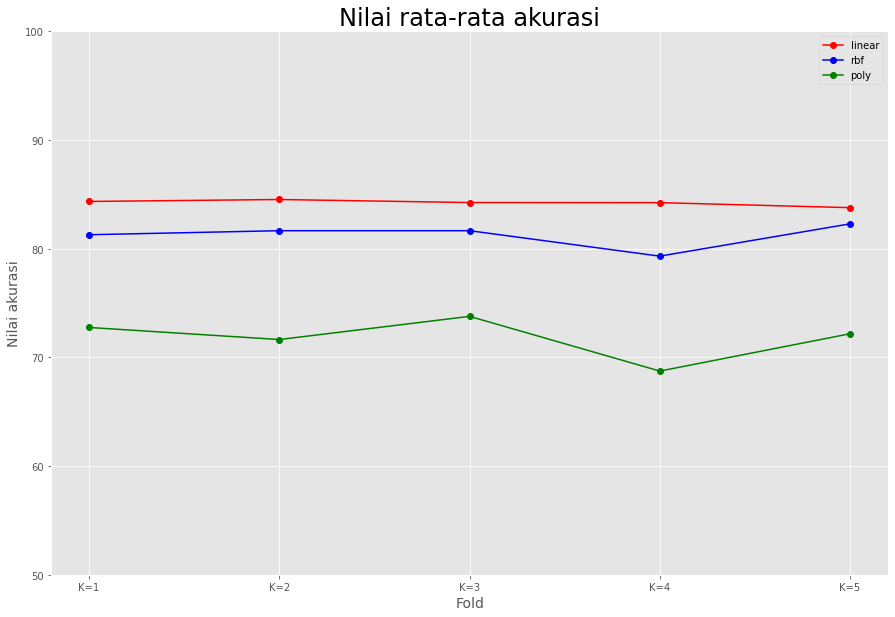

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
n_fold = ['K=1','K=2','K=3','K=4','K=5']
line_1 = [84.34,84.52,84.24,84.23,83.77]
line_2 = [81.28, 81.65, 81.65, 79.31, 82.28]
line_3 = [72.75, 71.64, 73.77, 68.74, 72.17]

ax.plot(n_fold, line_1, color='red', marker='o', label='linear')
ax.plot(n_fold, line_2, color='blue', marker='o', label='rbf')
ax.plot(n_fold, line_3, color='green', marker='o', label='poly')
plt.title('Nilai rata-rata akurasi', fontsize=24)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Nilai akurasi', fontsize=14)
plt.legend()
#plt.grid(False)
ax.set_ylim([50, 100])
plt.savefig("hasil akurasi 3 kernel rata.jpeg")
plt.show()

# Validasi test inputan

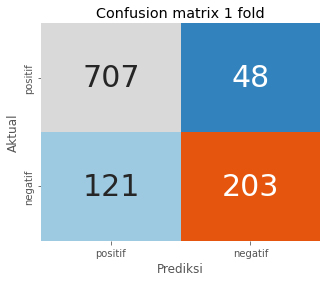

0


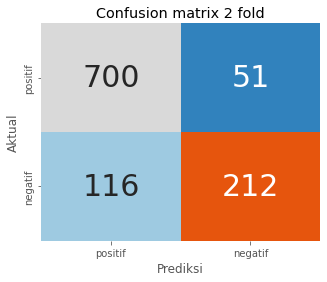

1


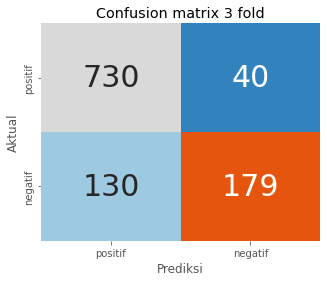

2


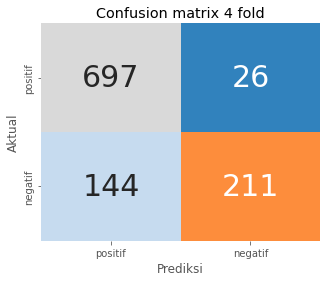

3


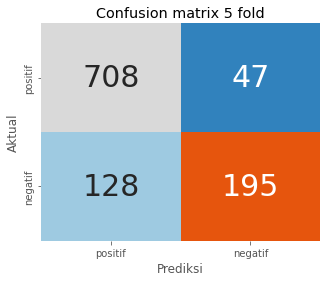

4


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

for i in range(len(c_matriks)):
    plt.figure(figsize = (5,4))
    label_names = ["positif", "negatif"]
    metriks = pd.DataFrame(c_matriks[i], index = label_names, columns = label_names)
    sn.heatmap(metriks,cmap='tab20c', annot=True, annot_kws={"size": 30}, fmt='g',cbar=False) #cbar false for rmove range num
    plt.title("Confusion matrix %d fold"%(i+1))
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.savefig("hasil/Confusion matrix %d fold kernel %s.jpeg"%(i+1,kernels))
    plt.show()
    print(i)